In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
def manhattan(x,y):
    return abs(x[0] - y[0]) + abs(x[1]-y[1])

directions = [(-1,0),(0,-1),(1,0),(0,1)]

def is_valid(point,m,n):
    x = point[0]
    y=point[1]

    if 0<=x<m and 0<=y<n and grid[x,y] != -1:
        return True
    return False

def plot_grid(grid,curr,nxt=None):
    cmap = colors.ListedColormap(['black','green','white','yellow'])
    plt.imshow(grid,cmap)
    if nxt:
        plt.title(f'Currently exploring {curr} with neighbor {nxt}')
    else:
        plt.title(f'Currently exploring {curr}')
    plt.show()

In [ ]:
grid = np.ones((5,4))
grid[0,3]=-1
grid[1,1]=-1
grid[3,0]=-1
grid[3,2]=-1
grid[3,3]=-1

grid

array([[ 1.,  1.,  1., -1.],
       [ 1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [-1.,  1., -1., -1.],
       [ 1.,  1.,  1.,  1.]])

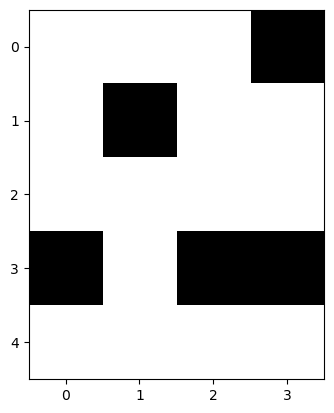

In [ ]:
cmap = colors.ListedColormap(['black','white'])
plt.imshow(grid,cmap)
plt.show()

In [ ]:
def tree_search(grid, start, goal):
    m,n = grid.shape

    frontier = []
    # f(n) , g(n) , current node
    heapq.heappush(frontier, [manhattan(start,goal) , 0, start])

    while frontier:

        f_curr , g_curr , curr = heapq.heappop(frontier)

        if not is_valid(curr, m,n):
            continue

        if grid[curr[0],curr[1]] == -1:
            continue

        grid[curr[0] , curr[1]] = 0

        if curr == goal:
            plot_grid(grid,curr)
            return 'Goal reached!'

        for d in directions:
            nxt = curr + np.array(d)
            nxt = list(nxt)

            if not is_valid(nxt,m,n):
                continue

            # f(n) = g(n) + h(n)
            g_nxt = g_curr + 1
            f_nxt = g_nxt + manhattan(nxt,goal)

            heapq.heappush(frontier, [f_nxt, g_nxt , nxt])

            if is_valid(nxt,m,n):
                grid[nxt[0] , nxt[1]] = 2

            plot_grid(grid,curr,nxt)

    plot_grid(grid,curr)

    return 'Goal Not Found!'

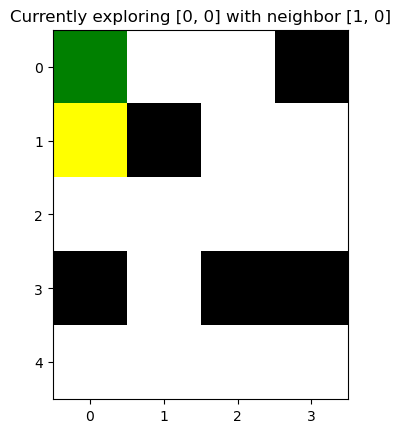

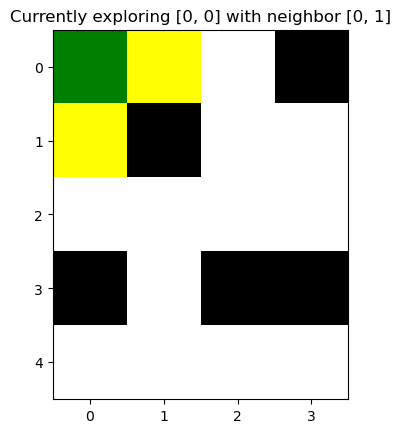

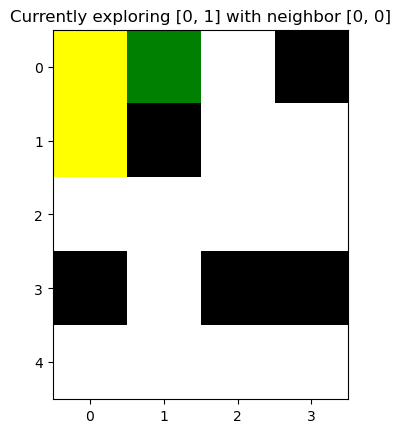

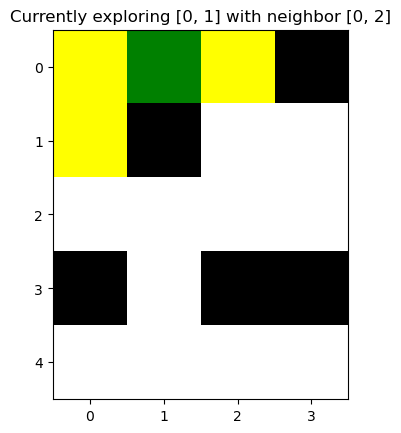

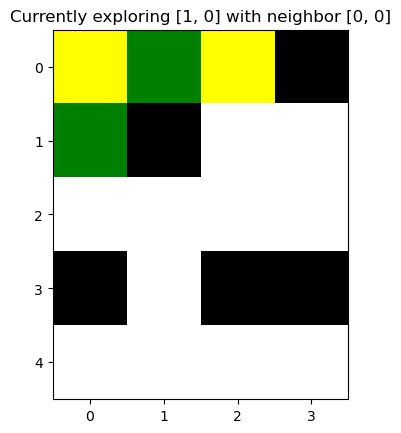

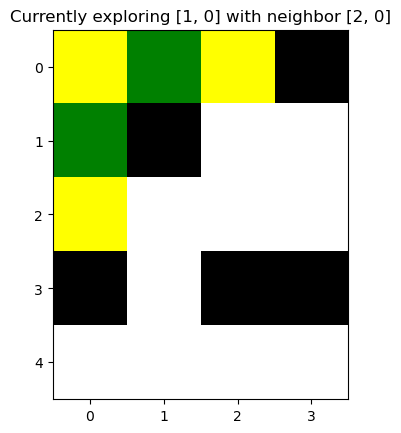

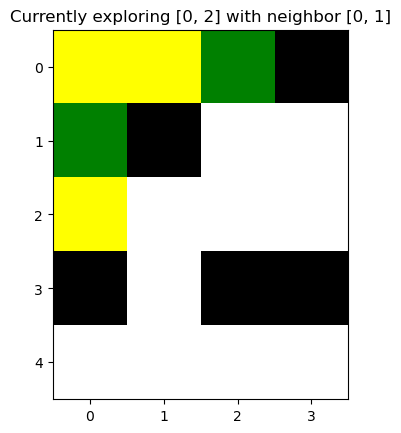

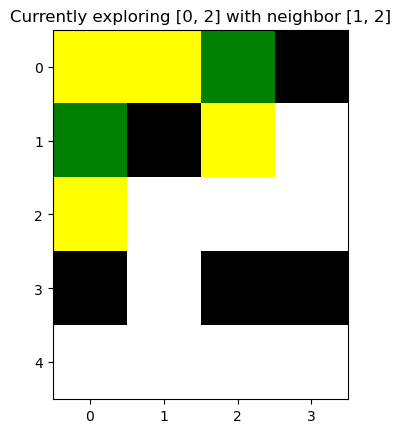

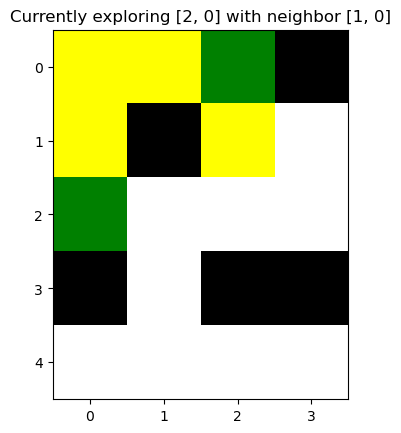

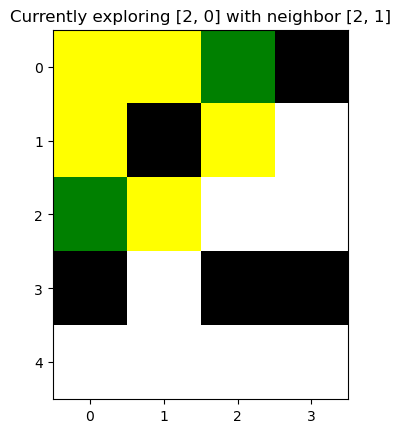

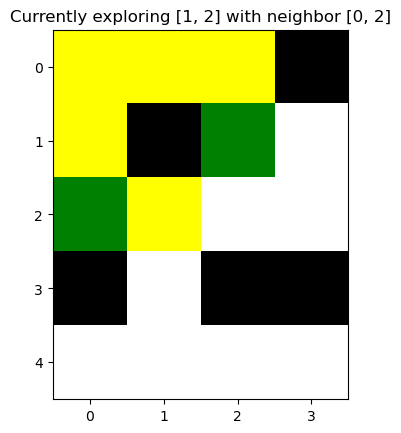

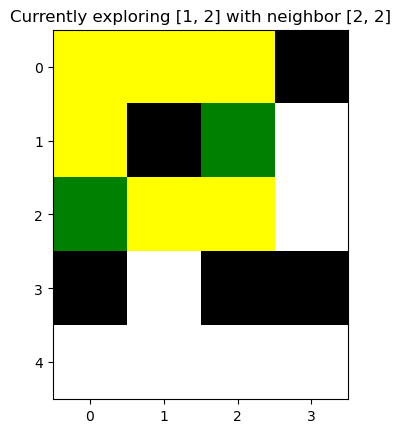

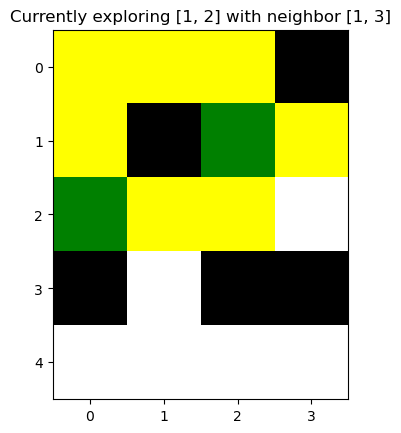

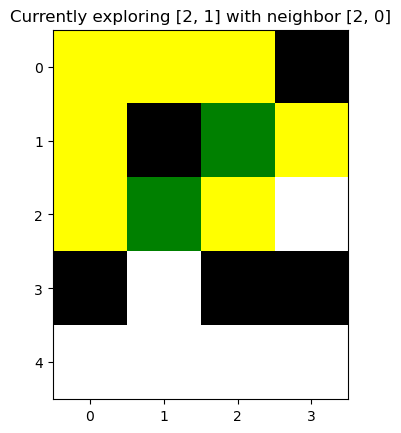

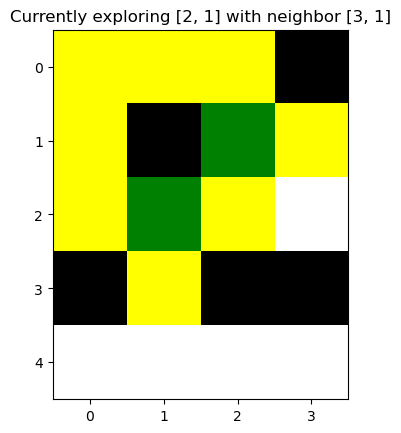

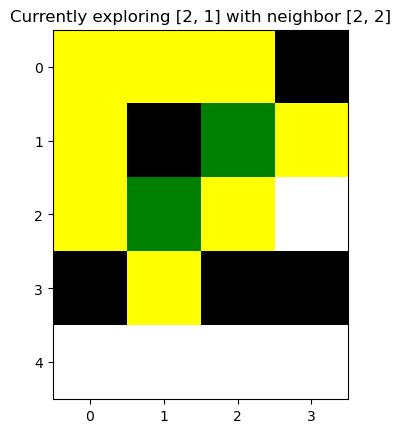

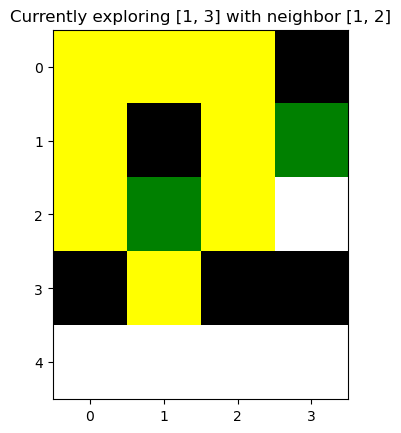

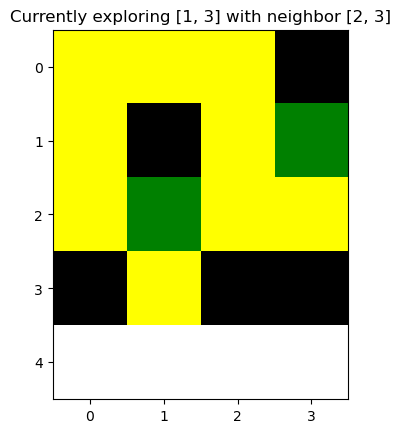

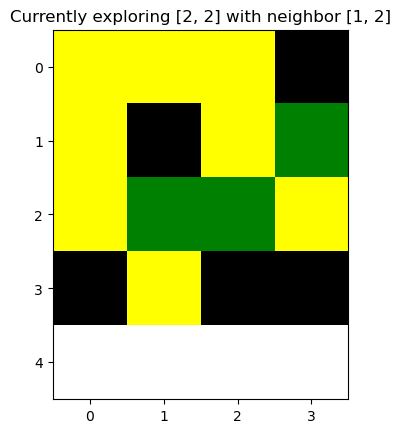

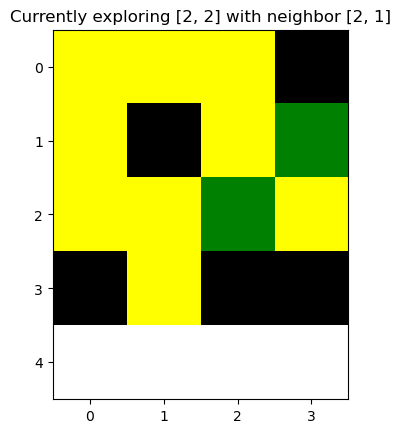

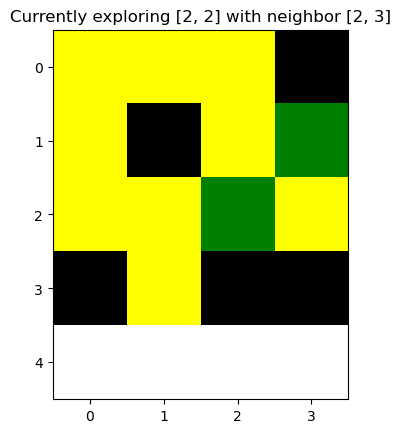

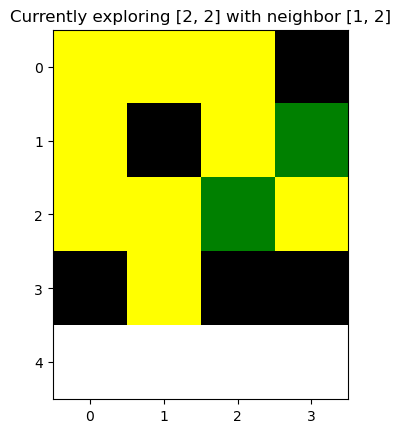

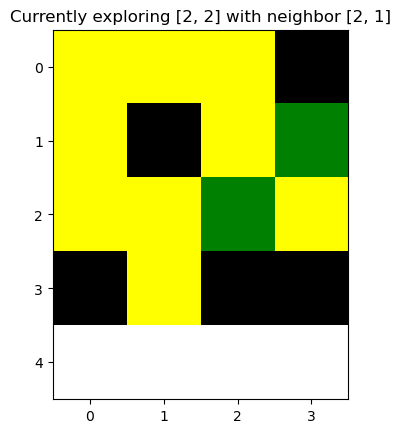

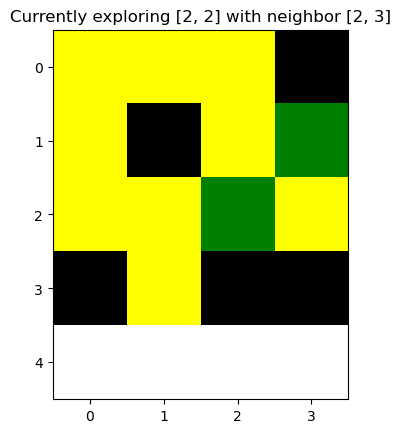

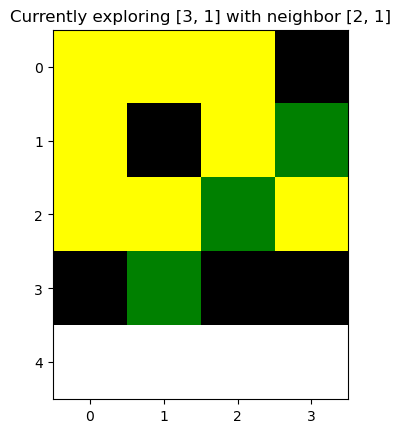

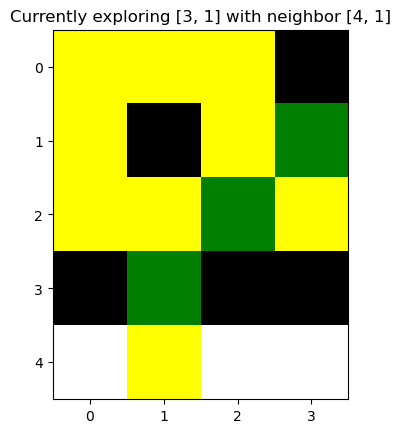

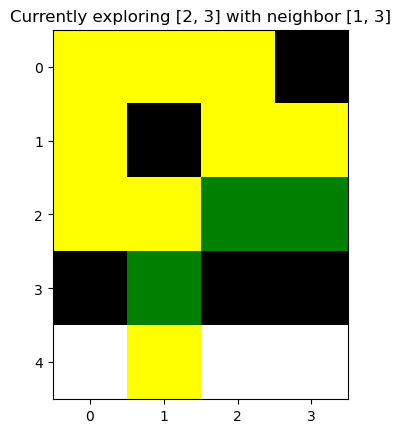

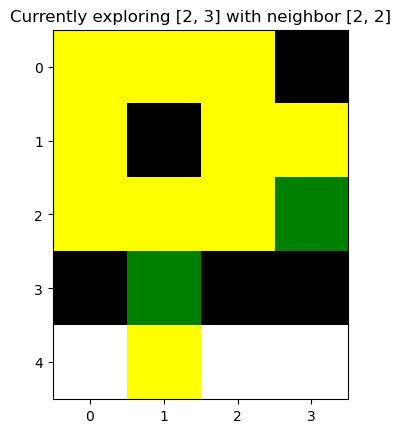

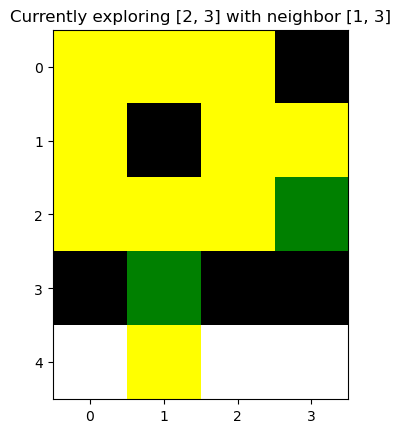

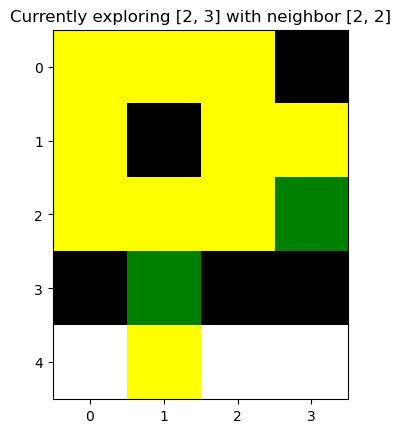

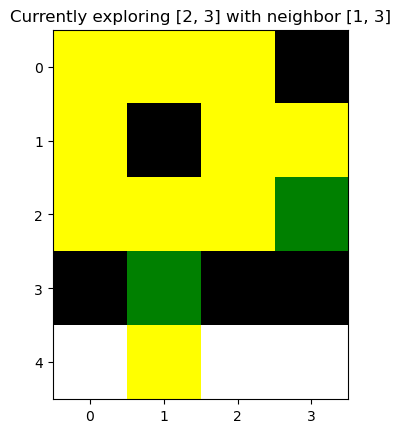

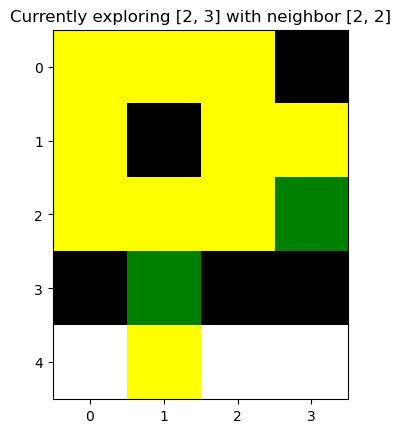

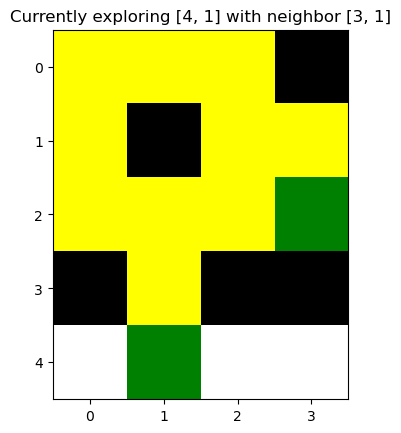

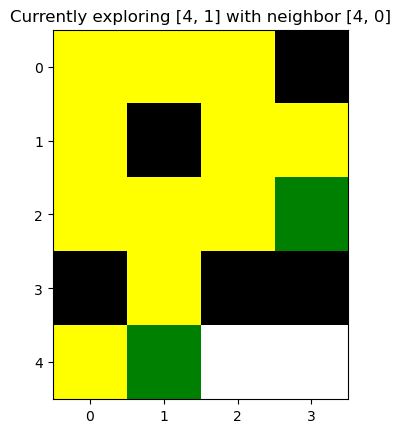

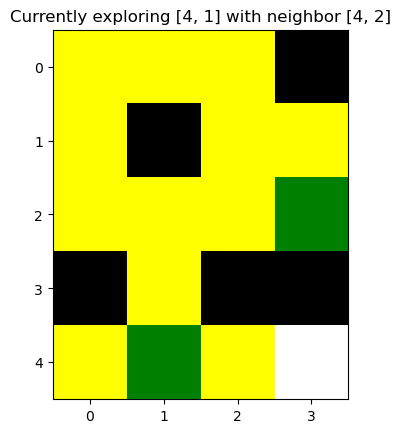

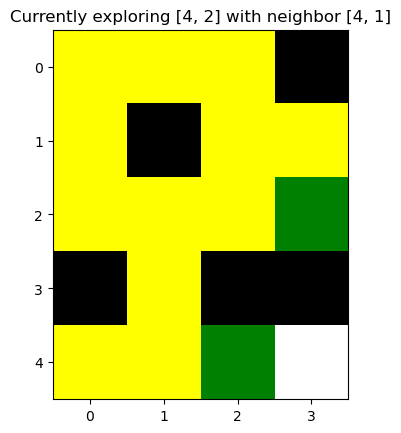

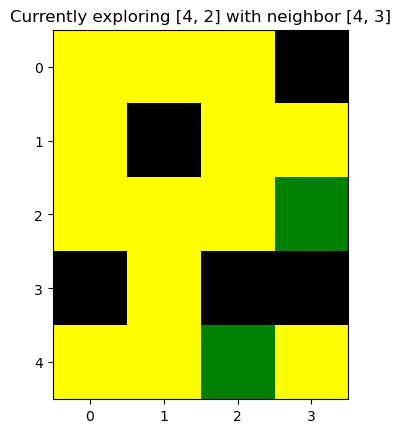

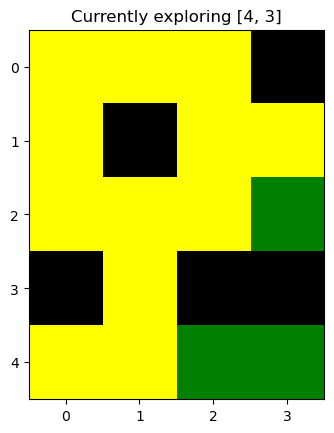

'Goal reached!'

In [ ]:
grid = np.ones((5,4))
grid[0,3]=-1
grid[1,1]=-1
grid[3,0]=-1
grid[3,2]=-1
grid[3,3]=-1

tree_search(grid,[0,0] , [4,3])

In [ ]:
def graph_search(grid,start,goal):
    m,n = grid.shape

    frontier = []

    heapq.heappush(frontier, [manhattan(start,goal) , 0 , start])

    while frontier:

        f_curr , g_curr , curr = heapq.heappop(frontier)

        if not is_valid(curr,m,n):
            continue

        if grid[curr[0],curr[1]] == 0:
            continue

        grid[curr[0],curr[1]] = 0

        if curr == goal:
            plot_grid(grid,curr)
            return 'Goal Reached!'

        for d in directions:
            nxt = curr + np.array(d)
            nxt = list(nxt)

            if is_valid(nxt,m,n) and grid[nxt[0],nxt[1]] != 0:

                g_nxt = g_curr + 1
                f_nxt = g_nxt + manhattan(nxt,goal)

                heapq.heappush(frontier, [f_nxt,g_nxt,nxt])
                grid[nxt[0],nxt[1]]=2

                plot_grid(grid,curr,nxt)

    plot_grid(grid,curr)
    return 'Goal Not Reached'

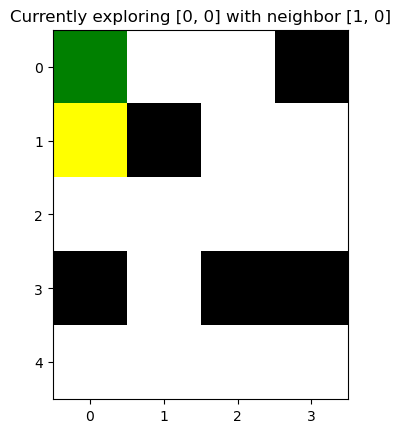

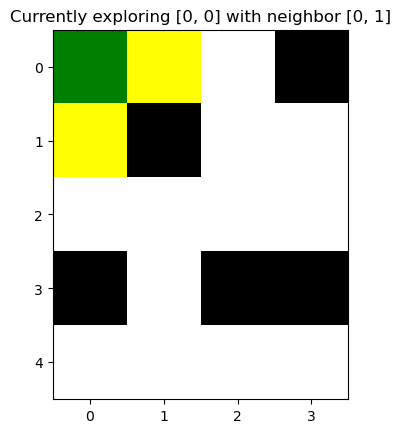

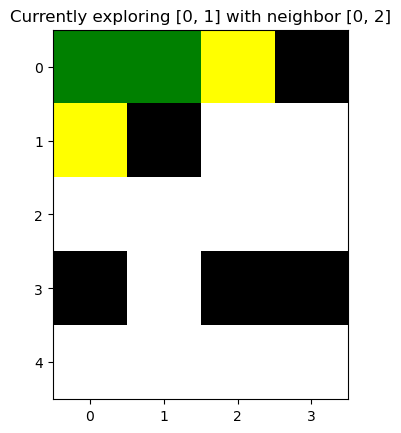

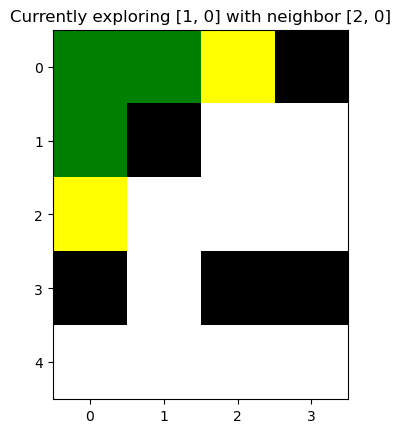

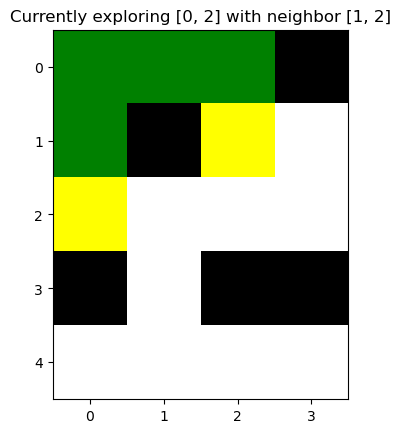

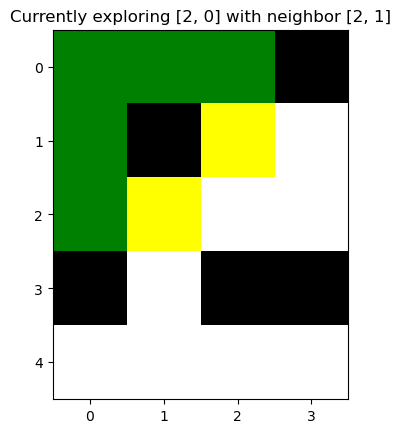

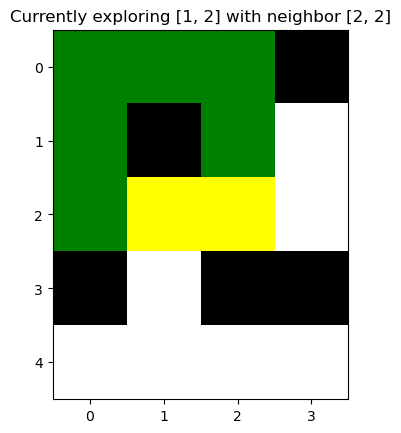

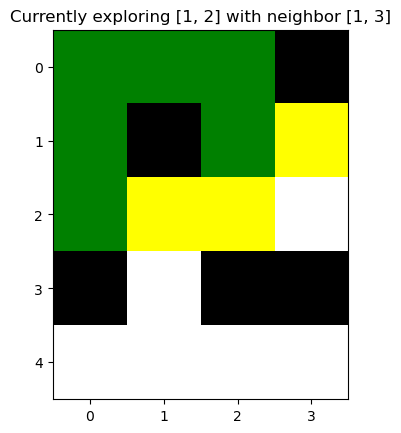

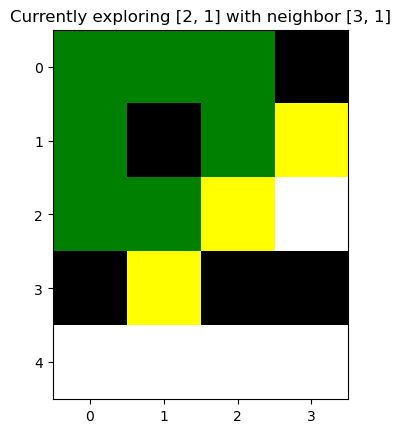

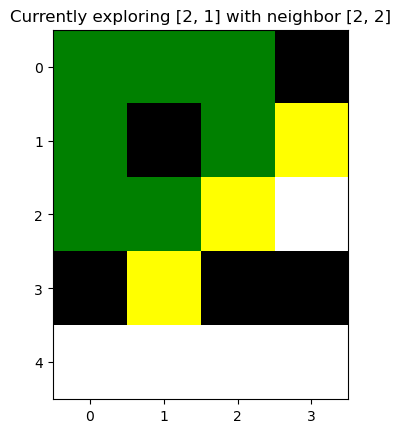

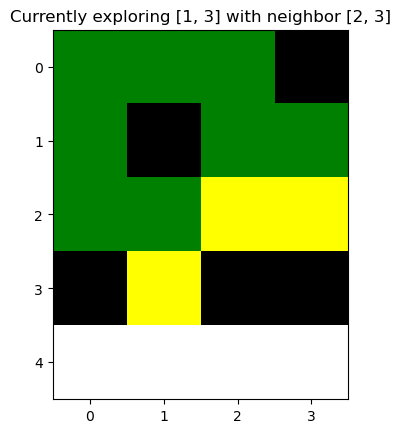

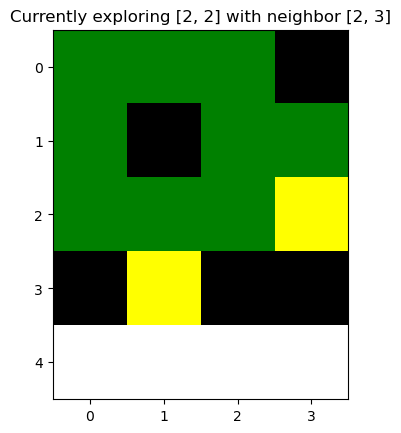

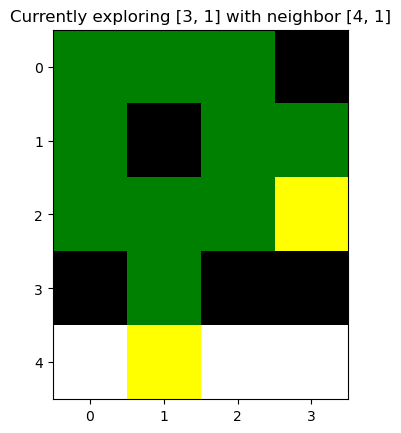

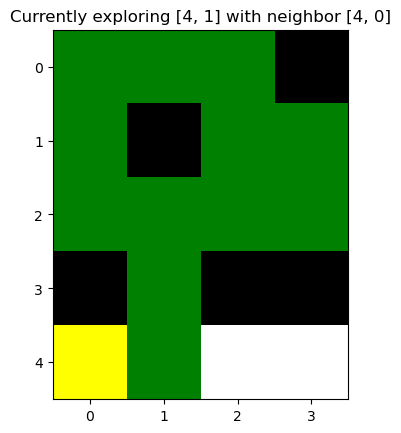

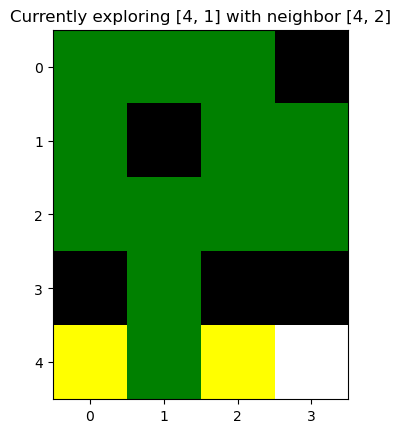

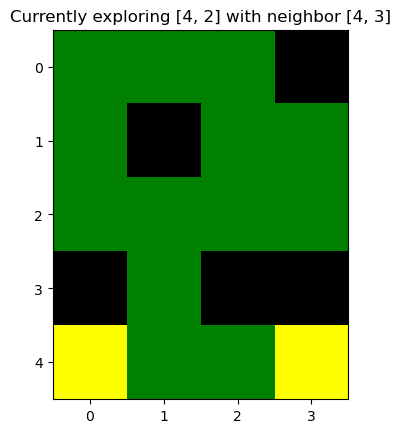

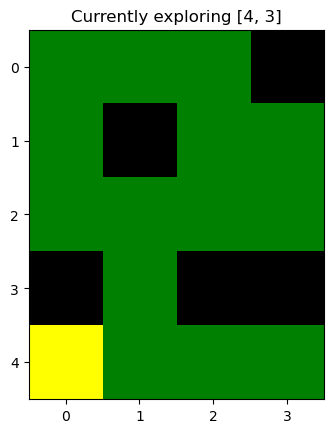

'Goal Reached!'

In [ ]:
grid = np.ones((5,4))
grid[0,3]=-1
grid[1,1]=-1
grid[3,0]=-1
grid[3,2]=-1
grid[3,3]=-1

graph_search(grid,[0,0] , [4,3])